# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
data = pd.read_csv('dataset/data.csv')

In [3]:
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


# Create data report

In [4]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data, title='Data Report')
#profile.to_file('Data_Report.html')

# EDA (Exploratory Data Analysis)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [6]:
data.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [7]:
X = data['Height']
y = data['Weight']
X.head(), y.head()

(0    1.47
 1    1.50
 2    1.52
 3    1.55
 4    1.57
 Name: Height, dtype: float64,
 0    52.21
 1    53.12
 2    54.48
 3    55.84
 4    57.20
 Name: Weight, dtype: float64)

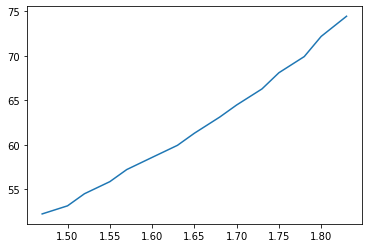

In [8]:
fig, ax = plt.subplots()
ax.plot(X, y)

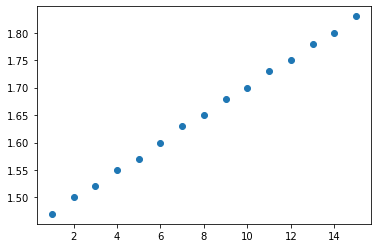

In [9]:
plt.scatter(np.arange(1, len(X) + 1), X)

# Split data into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias column

In [11]:
def add_ones_column(X):
    one = pd.DataFrame(np.ones(X.index.size), columns=['one'], index=X.index)
    return pd.concat((one, X), axis=1)

# Linear Regression Hypothesis

#### Step 1: 
Calculate the Cost of the model
#### Step 2: 
Apply Gradient Descent to make the value of theta better which also depends on alpha

In [12]:
def model_train(X, y, theta, alpha):
    # Cost function
    Jx = (2/(len(X))) * ((np.matmul(np.array(X), np.array(theta)) - y))
    cost = (2/(len(X))) * (np.sum(Jx**2))
    
    # Gradient Descent
    theta = (theta - alpha*(np.matmul(np.array(X.T), np.array(Jx))))
    
    return theta, cost

# Train model

In [13]:
theta = np.random.randn(2)
X_train_with_bias = add_ones_column(X_train)
for i in range(1, 800):
    theta, cost = model_train(X_train_with_bias, y_train, theta, 0.266)
    print('==========================================')
    print('Epoch: ', i)
    print('Cost value: ', cost.mean())
    print('Theta value: ', theta)
    print('==========================================')

Epoch:  1
Cost value:  189.56608401911149
Theta value:  [31.89664109 53.32376614]
Epoch:  2
Cost value:  186.06925702252175
Theta value:  [1.11542197 2.49201064]
Epoch:  3
Cost value:  182.63712806460268
Theta value:  [31.42006804 52.96578976]
Epoch:  4
Cost value:  179.26849949929561
Theta value:  [1.20725226 3.07597926]
Epoch:  5
Cost value:  175.9621958525328
Theta value:  [30.94940139 52.61619936]
Epoch:  6
Cost value:  172.71706341176048
Theta value:  [1.29447066 3.65089243]
Epoch:  7
Cost value:  169.5319698230635
Theta value:  [30.48454131 52.27483394]
Epoch:  8
Cost value:  166.40580369574596
Theta value:  [1.37717206 4.2169121 ]
Epoch:  9
Cost value:  163.3374742142345
Theta value:  [30.02538976 51.94153552]
Epoch:  10
Cost value:  160.32591075716533
Theta value:  [1.45544954 4.7741972 ]
Epoch:  11
Cost value:  157.37006252352342
Theta value:  [29.57185051 51.61614906]
Epoch:  12
Cost value:  154.46889816570365
Theta value:  [1.52939442 5.32290375]
Epoch:  13
Cost value:  151.

Epoch:  156
Cost value:  10.929156846687635
Theta value:  [-0.25336592 29.66025852]
Epoch:  157
Cost value:  10.734636702757209
Theta value:  [ 6.88300896 41.66334875]
Epoch:  158
Cost value:  10.54369373969826
Theta value:  [-0.33476568 29.86098758]
Epoch:  159
Cost value:  10.356261810326714
Theta value:  [ 6.66835794 41.64254398]
Epoch:  160
Cost value:  10.172275991807648
Theta value:  [-0.41692303 30.05936598]
Epoch:  161
Cost value:  9.991672562989361
Theta value:  [ 6.45541996 41.62348764]
Epoch:  162
Cost value:  9.814388982157045
Theta value:  [-0.49981656 30.25543278]
Epoch:  163
Cost value:  9.640363865198328
Theta value:  [ 6.24417065 41.60614292]
Epoch:  164
Cost value:  9.469536964172985
Theta value:  [-0.58342529 30.44922634]
Epoch:  165
Cost value:  9.301849146279483
Theta value:  [ 6.03458612 41.59047372]
Epoch:  166
Cost value:  9.137242373210817
Theta value:  [-0.66772863 30.64078434]
Epoch:  167
Cost value:  8.97565968089263
Theta value:  [ 5.82664285 41.57644459]
E

Epoch:  286
Cost value:  1.258211661061361
Theta value:  [-6.41515405 39.13564254]
Epoch:  287
Cost value:  1.2401826759073917
Theta value:  [-4.33500299 42.72127901]
Epoch:  288
Cost value:  1.2224717451915512
Theta value:  [-6.51532252 39.24105351]
Epoch:  289
Cost value:  1.2050730319126455
Theta value:  [-4.47459851 42.76086057]
Epoch:  290
Cost value:  1.1879808069647755
Theta value:  [-6.61546811 39.34561738]
Epoch:  291
Cost value:  1.1711894471403665
Theta value:  [-4.61343824 42.80081196]
Epoch:  292
Cost value:  1.1546934331701937
Theta value:  [-6.71558527 39.44934624]
Epoch:  293
Cost value:  1.1384873477996622
Theta value:  [-4.75153021 42.84112273]
Epoch:  294
Cost value:  1.1225658739007411
Theta value:  [-6.81566859 39.55225196]
Epoch:  295
Cost value:  1.1069237926187927
Theta value:  [-4.88888233 42.88178264]
Epoch:  296
Cost value:  1.091555981553767
Theta value:  [-6.91571276 39.65434619]
Epoch:  297
Cost value:  1.0764574129750266
Theta value:  [-5.02550236 42.9227

Epoch:  424
Cost value:  0.2950073844825476
Theta value:  [-13.06640673  44.90785143]
Epoch:  425
Cost value:  0.29306094261787086
Theta value:  [-12.52487026  45.91441604]
Epoch:  426
Cost value:  0.291140516393793
Theta value:  [-13.15677858  44.97474198]
Epoch:  427
Cost value:  0.2892456568319368
Theta value:  [-12.62599942  45.96311292]
Epoch:  428
Cost value:  0.2873759231595632
Theta value:  [-13.2469395   45.04127581]
Epoch:  429
Cost value:  0.28553088265800414
Theta value:  [-12.72671612  46.01178846]
Epoch:  430
Cost value:  0.2837101105139008
Theta value:  [-13.33688863  45.10745666]
Epoch:  431
Cost value:  0.28191318967319867
Theta value:  [-12.82702322  46.06044021]
Epoch:  432
Cost value:  0.28013971069783344
Theta value:  [-13.42662513  45.1732882 ]
Epoch:  433
Cost value:  0.27838927162508265
Theta value:  [-12.92692357  46.10906574]
Epoch:  434
Cost value:  0.2766614778295119
Theta value:  [-13.51614821  45.23877403]
Epoch:  435
Cost value:  0.2749559418874736
Theta 

Epoch:  561
Cost value:  0.15805926670424628
Theta value:  [-18.58117542  49.08901872]
Epoch:  562
Cost value:  0.15753961586781762
Theta value:  [-18.78342526  48.84033805]
Epoch:  563
Cost value:  0.15702317933417387
Theta value:  [-18.65934529  49.13270706]
Epoch:  564
Cost value:  0.15650991847626794
Theta value:  [-18.85843586  48.88898308]
Epoch:  565
Cost value:  0.15599979531410785
Theta value:  [-18.73723712  49.17629157]
Epoch:  566
Cost value:  0.155492772503004
Theta value:  [-18.933225    48.93743135]
Epoch:  567
Cost value:  0.1549888133220238
Theta value:  [-18.81485225  49.21977186]
Epoch:  568
Cost value:  0.15448788166266814
Theta value:  [-19.00779299  48.98568422]
Epoch:  569
Cost value:  0.15398994201775099
Theta value:  [-18.892192    49.26314757]
Epoch:  570
Cost value:  0.15349495947048603
Theta value:  [-19.08214011  49.03374301]
Epoch:  571
Cost value:  0.15300289968377545
Theta value:  [-18.96925769  49.30641836]
Epoch:  572
Cost value:  0.15251372888969567
T

Epoch:  692
Cost value:  0.10830397284276633
Theta value:  [-23.21491691  51.64216153]
Epoch:  693
Cost value:  0.10802152593258571
Theta value:  [-23.1976926   51.74076238]
Epoch:  694
Cost value:  0.10774013111492386
Theta value:  [-23.27635831  51.68022329]
Epoch:  695
Cost value:  0.1074597825264573
Theta value:  [-23.25992529  51.77728357]
Epoch:  696
Cost value:  0.1071804743680386
Theta value:  [-23.33760627  51.71814966]
Epoch:  697
Cost value:  0.10690220090364999
Theta value:  [-23.32194836  51.81369696]
Epoch:  698
Cost value:  0.1066249564593818
Theta value:  [-23.39866131  51.75594128]
Epoch:  699
Cost value:  0.10634873542242314
Theta value:  [-23.38376262  51.85000269]
Epoch:  700
Cost value:  0.1060735322400764
Theta value:  [-23.45952393  51.7935988 ]
Epoch:  701
Cost value:  0.10579934141878633
Theta value:  [-23.44536887  51.8862009 ]
Epoch:  702
Cost value:  0.10552615752318711
Theta value:  [-23.52019464  51.83112285]
Epoch:  703
Cost value:  0.10525397517516677
Th

# Value of theta for which we are training the model

In [14]:
theta

array([-26.22481491,  53.5319767 ])

# Predict from the model

In [15]:
def predict(X, theta):
    X = add_ones_column(X)
    pred = np.matmul(np.array(X), np.array(theta))
    return pred

In [16]:
y_pred = predict(X_test, theta)

# Plot between actual and predicted value

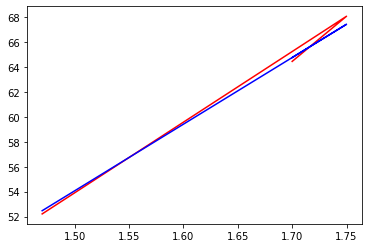

In [17]:
plt.plot(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='b')
plt.show()

# Root mean square error

In [18]:
def rms_error(true, predict):
    rms = np.sqrt((1/2*len(y_test)) * (sum((np.array(y_test) - np.array(y_pred))**2)))
    return rms

In [19]:
rms = rms_error(y_test, y_pred)
rms

0.9299319946619806